# 01 Tutorial

### 0. Installation

`or-tools`는 python 3.8+에서 `pip` 명령어를 사용하여 쉽게 설치할 수 있다.

```{shell}
python3 -m pip install ortools
```

### 1. `cp_model`이란?

`cp-model`은 `or-tools`에서 제공하는 solver 중 SAT(Satisfiability problem, 충족 가능성 문제)를 해결할 수 있는 solver입니다.
SAT problem은 주어진 논리식들이 참이 되는 변수값이 존재하는지 판별하는 문제이기 때문에, SAT로 변환하기 전 문제 또한 이산형 변수들로만 이루어진 문제여야 논리식으로 변환이 가능하다. 즉, 연속형 변수가 포함된 문제는 해결할 수 없다.

예를 들어,
$$\begin{aligned}\text{maximize} \quad & z \\ \text{subject to} \quad & z = x + y \\ & 2x + y \le 300 \\ & x + 5y \le 600 \\ & x \in \mathbb{Z}^{+} \\ & y \in \mathbb{Z}^{+} \end{aligned}$$

와 같은 문제를 해결할 수 있다.

### 2. `cp_model` 사용 방법

`cp_model`은 변수 설정, 제약식 추가, solver 실행의 3단계로 문제를 해결한다.

#### (0) Model, solver 정의

`cp_model`을 사용하기 위해 model, solver을 정의해야 한다.
* model: 변수, 제약식에 대한 정보 저장
* solver: `solver.Solve()` 결과 저장

In [1]:
from ortools.sat.python import cp_model

model = cp_model.CpModel()
solver = cp_model.CpSolver()

#### (1) 변수 설정

`cp_model`에서 사용할 수 있는 변수는 integer(`NewIntVar`), bool(`NewBoolVar`), interval(`NewIntervalVar`)이 있다.

사용 방법은 다음과 같다.

* integer: `model.NewIntVar(<lower_bound>, <upper_bound>, <variable_name>)`
* bool: `model.NewBoolVar(<variable_name>)`
* interval: `model.NewIntervalVar(<interval_start>, <interval_end>, <interval_value>, <variable_name>)`

In [2]:
x = model.NewIntVar(0, 600, "x")
y = model.NewIntVar(0, 600, "y")
z = model.NewIntVar(0, 1200, "z")


#### (2) 제약식 추가

In [3]:
model.Add(2 * x + y <= 300)
model.Add(x + 5 * y <= 600)
model.Add(z == x + y)

model.Maximize(z)

#### (3) solver 실행

In [4]:
status = solver.Solve(model)
print(status == cp_model.OPTIMAL)

True


status로 가능한 값은 다음과 같다.

|**status**|**설명**|
|------|---|
|`OPTIMAL`|model을 만족하는 optimal solution이 존재한다.|
|`FEASIBLE`|model을 만족하는 solution이 존재하지만 optimal인지 판별할 수는 없다.|
|`INFEASIBLE`|model을 만족하는 solution이 존재하지 않는다.|
|`MODEL_INVALID`|model이 성립하지 않는다.|
|`UNKNOWN`|model을 만족하는 solution의 존재 여부를 확인할 수 없다.|

status가 OPTIMAL 또는 FEASIBLE인 경우 `solver.value`를 통해 각 변수들의 값을 확인할 수 있다.

In [5]:
if status in [cp_model.OPTIMAL, cp_model.FEASIBLE]:
    print(f"x = {solver.Value(x)}, y = {solver.Value(y)}, z = {solver.Value(z)}")
else:
    print("No solution exists.")

x = 100, y = 100, z = 200


실제로 $x=100, y=100, z=200$이 예시 문제의 optimal solution임을 그래프를 통해 확인할 수 있다.

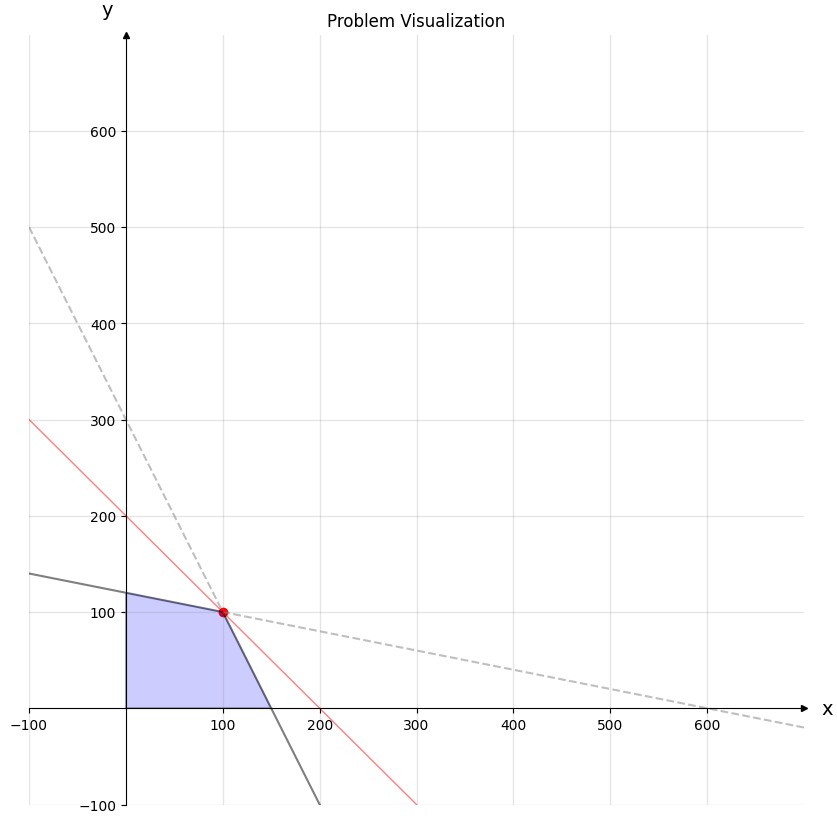

In [20]:
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt

# Enter x and y coordinates of points and colors
xs = [100]
ys = [100]
colors = ['r']

# Select length of axes and the space between tick labels
xmin, xmax, ymin, ymax = -100, 600, -100, 600
ticks_frequency = 100

# Plot points
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xs, ys, c=colors)

# Draw lines connecting points to axes
ax.plot([200, 100], [-100, 100], c='black', ls='-', lw=1.5, alpha=0.5)
ax.plot([-100, 100], [500, 100], c='gray', ls='--', lw=1.5, alpha=0.5)
ax.plot([-100, 100], [140, 100], c='black', ls='-', lw=1.5, alpha=0.5)
ax.plot([700, 100], [-20, 100], c='gray', ls='--', lw=1.5, alpha=0.5)
ax.plot([0, 150], [0, 0], c='gray', ls='-', lw=1.5, alpha=0.5)
ax.plot([0, 0], [0, 120], c='gray', ls='-', lw=1.5, alpha=0.5)
ax.plot([300, -100], [-100, 300], c="red", ls="-", lw=1, alpha=0.5)

# Draw polygon
points = np.array([[0, 0], [150, 0], [100, 100], [0, 120]])
polygon = patches.Polygon(points, color="blue", alpha=0.2)
plt.gca().add_patch(polygon)

# Set identical scales for both axes
# ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

# Create custom major ticks to determine position of tick labels
x_ticks = np.arange(xmin, xmax+100, ticks_frequency)
y_ticks = np.arange(ymin, ymax+100, ticks_frequency)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])

ax.set_xlim([xmin, xmax+100])
ax.set_ylim([ymin, ymax+100])

# Draw major and minor grid lines
ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

# Draw arrows
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

plt.title("Problem Visualization")

plt.show()